# Python S17: Logistic Regression

## My Course Notes and Code

These are my notes from Jose Portilla's Udemy [course](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/).

I'm now focusing on the section 17 of the course: Logistic Regression.

### S16V90

#### Setup

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

In [388]:
train = pd.read_csv("C:\\Users\\PC\\Desktop\\Python\\Udemy - P for DS and ML Bootcamp\\13-Logistic-Regression\\titanic_train.csv")


#### EDA

In [389]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [390]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dealing with missing data

In [391]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


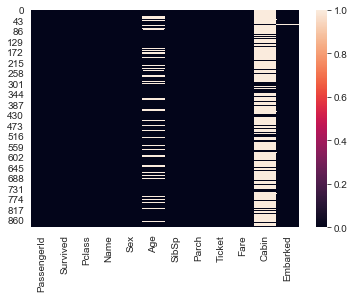

In [392]:
sns.heatmap(train.isnull())

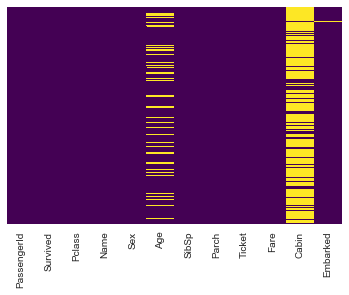

In [393]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [394]:
print(f"The percentage of missing values in the 'Age' column is: {round(sum(train['Age'].isnull()) / len(train['Age']), 2)}")
print(f"The percentage of missing values in the 'Cabin' column is: {round(sum(train['Cabin'].isnull()) / len(train['Cabin']), 2)}")

The percentage of missing values in the 'Age' column is: 0.2
The percentage of missing values in the 'Cabin' column is: 0.77


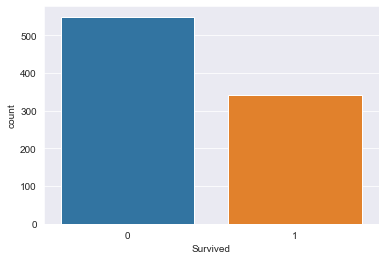

In [395]:
sns.countplot(train['Survived'])

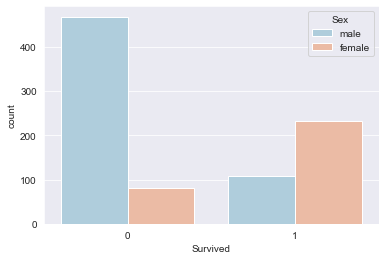

In [396]:
sns.countplot(data = train, x = 'Survived', hue = 'Sex', palette = 'RdBu_r')

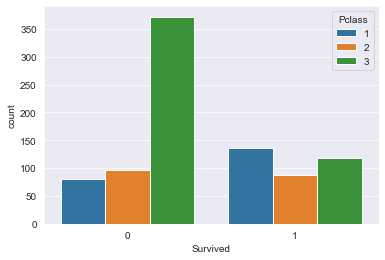

In [397]:
sns.countplot(data = train, x = 'Survived', hue = 'Pclass')

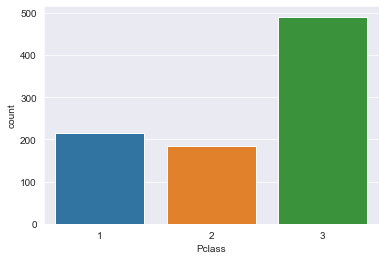

In [398]:
sns.countplot(data = train, x = 'Pclass')

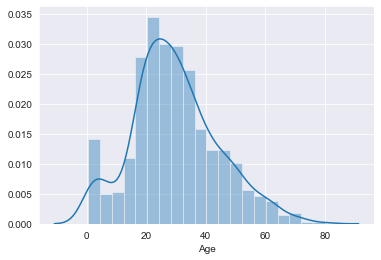

In [399]:
sns.distplot(train['Age'].dropna())

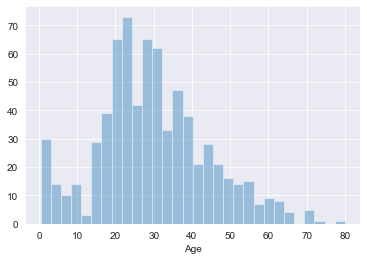

In [400]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

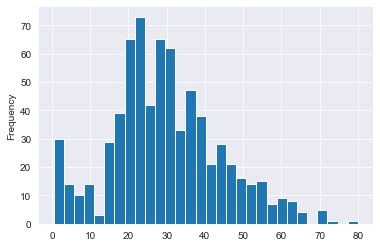

In [401]:
train['Age'].plot.hist(bins = 30)

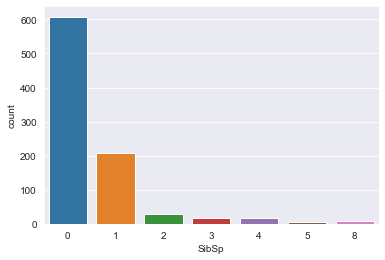

In [402]:
sns.countplot(x = 'SibSp', data = train)

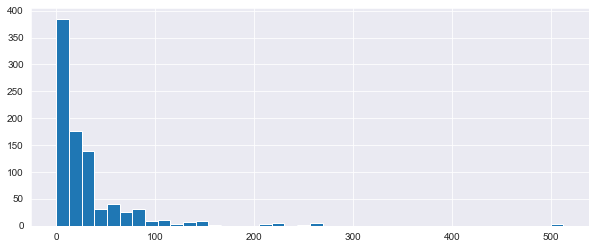

In [403]:
train['Fare'].hist(bins = 40, figsize = (10, 4))

In [404]:
import cufflinks as cf
cf.go_offline()

In [405]:
#train['Fare'].iplot(kind = 'hist', bins = 30)

### S16V91

#### Missing values

- average values
  - by other categories (e.g., passenger class)

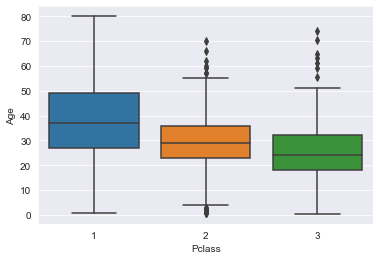

In [406]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [407]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [408]:
train[['Age', 'Pclass']].dropna().groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [409]:
def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [410]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

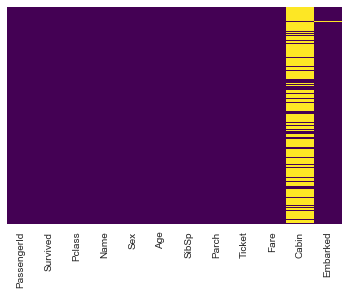

In [411]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [412]:
train.drop('Cabin', axis = 1, inplace = True)

In [413]:
train.dropna(inplace = True)

#### Categorical variables to dummies

In [414]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [415]:
pd.get_dummies(train['Sex'], drop_first = True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [416]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [417]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [418]:
embarked = pd.get_dummies(train['Embarked'], drop_first = True)

In [419]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [420]:
train = pd.concat([train, sex, embarked], axis = 1)

In [421]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [422]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [423]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [424]:
train.drop('PassengerId', axis = 1, inplace = True)

In [425]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### S16V92

#### Train-Test Split

In [426]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [427]:
y = train['Survived']

X = train.drop('Survived', axis = 1)

In [467]:
from sklearn.model_selection import train_test_split

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

#### Fitting the model

In [430]:
from sklearn.linear_model import LogisticRegression

In [431]:
logmodel = LogisticRegression(max_iter=10000)

In [432]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [433]:
predictions = logmodel.predict(X_test)

In [434]:
from sklearn.metrics import classification_report

In [435]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [436]:
from sklearn.metrics import confusion_matrix

In [437]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 31,  73]], dtype=int64)

## Chapter Project

#### Setup

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# %matplotlib inline
# sns.set_style("darkgrid")

In [440]:
ad_data = pd.read_csv("C:\\Users\\PC\\Desktop\\Python\\Udemy - P for DS and ML Bootcamp\\13-Logistic-Regression\\advertising.csv")

#### EDA

In [439]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [441]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [442]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


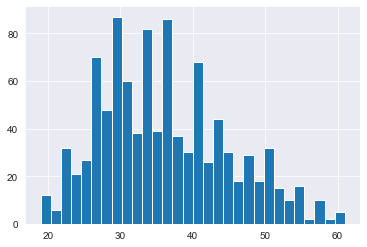

In [444]:
ad_data['Age'].hist(bins = 30)

In [447]:
import scipy.stats as stats

c:\Users\PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



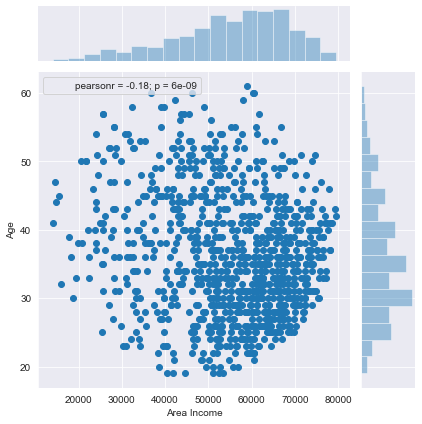

In [448]:
sns.jointplot(x = 'Area Income', y = 'Age', data = ad_data).annotate(stats.pearsonr)

c:\Users\PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



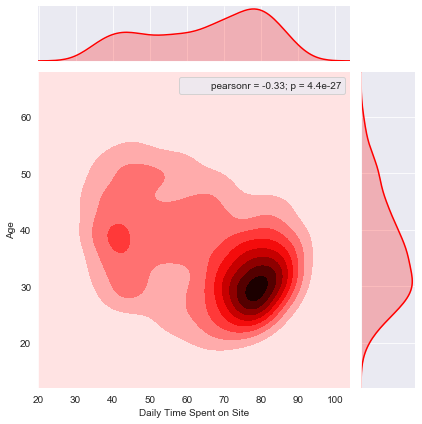

In [451]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Age', data = ad_data, kind = 'kde', color = 'red').annotate(stats.pearsonr)

c:\Users\PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



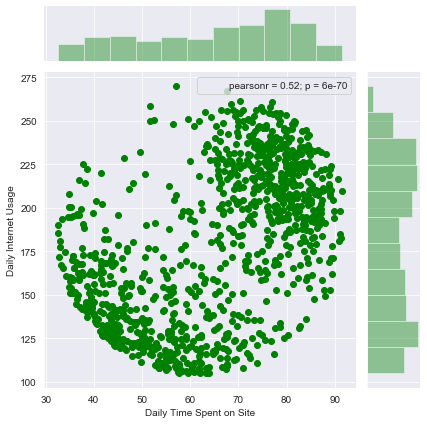

In [454]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = ad_data, color = 'green').annotate(stats.pearsonr)

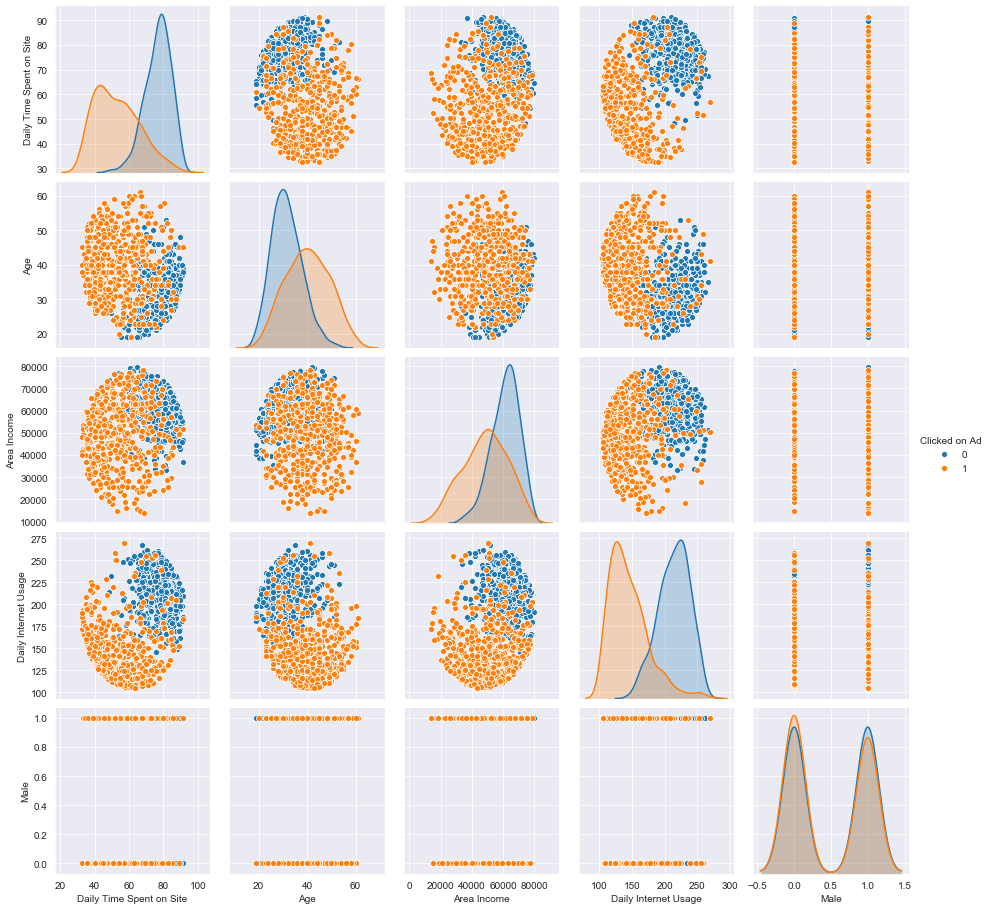

In [464]:
sns.pairplot(ad_data, hue = 'Clicked on Ad')

In [465]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


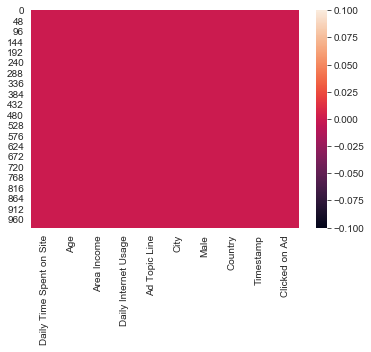

In [466]:
sns.heatmap(ad_data.isnull())

#### Train-Test Split

In [468]:
y = ad_data['Clicked on Ad']

X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

In [469]:
from sklearn.model_selection import train_test_split

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

#### Fitting the model

In [471]:
from sklearn.linear_model import LogisticRegression

In [474]:
logmodel = LogisticRegression()

In [475]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [476]:
predictions = logmodel.predict(X_test)

In [477]:
from sklearn.metrics import classification_report, confusion_matrix

In [481]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [482]:
confusion_matrix(y_test, predictions)

array([[149,   8],
       [ 14, 129]], dtype=int64)